# Credit Card Balance Prediction 

## Case Overview

A leading Credit Card issuer bank is looking to develop analytical strategies for its upcoming marketing campaigns to target profitable prospects. They are looking to develope a Life Time Value model of its customers and a model predicting the balance would be a key input into the LTV model. The business wants to identify those key factors that helps maintain higher balances.

The company decides that they would like to predict the average monthly balance considering the balance in the first 6 months of enrollment. They run 4 campaighns a year and use this model in them.  

The given dataset is the data that was used in the June'14 campaign

## Case Solution

The case clearly states that from the given factors the Credit Card company seeks to build a model for predicting the ***"Average Monthly Balance"***. This variable to be predicted is a numeric variable.

As the problem requires prediction of numeric variable, the "Traditional" and a very reliable statistical analysis that can be used is Linear Regression. Linear Regression essentially fits a straight line which can be generallized as a \begin{equation*} Y = mX+ C \end{equation*}

The ***Y*** here being the predicted variable and ***X*** the predictor. The ***m*** is a slope value (The rate at which X changes to a change in Y) and ***C*** denotes a fixed constant that is added regardless of the value of X or Y. 

In a more complex problem there are a lot of predictors that help in predicting the most accurate value of the Y.  Such models that include more factors are called ***Multiple Linear Regression***. In such a case there are more than 1 X variable, but still only 1 Y variable exists.

Because of more advancements in mathametics and the field of Data Science, with the advent of increased use of Machine Learning, these new Machine Algorithms are being used more often as a substitute for Linear Regression as they go beyond just fitting a straight line into the model. 

In this solution here, we will first explore a solution using Multiple Linear Regression run some model tuning and a few measures to check how well the model will work for future unseen data. After that, a Machine Learning model will also be created with the help of a few tuning parameters and the results of both these models will be compared to see the extent to which the ML model outperforms a the Traditional Linear Regression model.

Firstly, let's load the required libraries for the model that we are going to use for the first Multiple Linear Regression Model

In [2]:
library(data.table)
library(dplyr)
library(caret)
library(fastDummies)
library(DescTools)
library(rcompanion)
options(scipen = 999) # This is used to print the complete numeric value instead of values in scientific notation
# options(warn=1)

Next, we import the required data file into the environment

In [3]:
setwd("C:/Users/HOME/Desktop/Portfolio Publication/Linear Regression")
cust_data <- fread("Cust_Database.csv")


We examine the imported data

In [4]:
head(cust_data)

custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0
9662-FUSYIM-1IV,4,4,0,64,5,August,17,4,3,...,1,1,0,0,0,0,0,0,1,0


In [46]:
str(cust_data)

Classes 'data.table' and 'data.frame':	5000 obs. of  132 variables:
 $ custid           : chr  "3964-QJWTRG-NPN" "0648-AIPJSP-UVM" "5195-TLUDJE-HVO" "4459-VLPQUH-3OL" ...
 $ region           : num  1 5 3 4 2 4 2 3 2 2 ...
 $ townsize         : num  2 5 4 3 2 4 5 4 3 2 ...
 $ gender           : num  1 0 1 0 0 0 1 1 1 0 ...
 $ age              : num  20 22 67 23 26 64 52 44 66 47 ...
 $ agecat           : num  2 2 6 2 3 5 5 4 6 4 ...
 $ birthmonth       : chr  "September" "May" "June" "May" ...
 $ ed               : num  15 17 14 16 16 17 14 16 12 11 ...
 $ edcat            : num  3 4 2 3 3 4 2 3 2 1 ...
 $ jobcat           : num  1 2 2 2 2 3 1 1 1 6 ...
 $ union            : num  1 0 0 0 0 0 0 0 0 0 ...
 $ employ           : num  0 0 16 0 1 22 10 11 15 19 ...
 $ empcat           : num  1 1 5 1 1 5 3 4 4 5 ...
 $ retire           : num  0 0 0 0 0 0 0 0 1 0 ...
 $ income           : num  31 15 35 20 23 107 77 97 16 84 ...
 $ lninc            : num  3.43 2.71 3.56 3 3.14 4.67 4.34 4.57 2.7

The above codes give us a brief view of all the data available and the _str()_ function gives us an idea of the columns, class of the column and a few samples

From the given variables, we identify and seperate the numeric variables based on the variable definitions

### Numeric Variables

In [5]:
numerics <- c("age","ed","union","income","lninc","debtinc","creddebt","lncreddebt","othdebt","lnothdebt","spoused",
              "reside","pets","pets_cats","pets_dogs","pets_birds","pets_reptiles","pets_small","pets_saltfish","pets_freshfish",
              "carvalue","commutetime","carditems","cardspent","card2items","card2spent","tenure","longmon","lnlongmon","longten",
              "lnlongten","tollmon","lntollmon","tollten","lntollten","equipmon","lnequipmon","equipten","lnequipten","cardmon",       
              "lncardmon","cardten","lncardten","wiremon","lnwiremon","wireten","lnwireten","hourstv")
cust_ <- cust_data

Now we create user defined functions to get basic insights from our dataset

In [6]:
about_nums <- function(x){
  
  n = length(x)
  nmiss = sum(is.na(x))
  nmiss_pct = (mean(is.na(x)))*100
  sum = sum(x, na.rm=T)
  mean = mean(x, na.rm=T)
  median = quantile(x, p=0.5, na.rm=T)
  std = sd(x, na.rm=T)
  var = var(x, na.rm=T)
  pctl = quantile(x, p=c(0, 0.01, 0.05,0.1,0.25,0.5, 0.75,0.9,0.95,0.99,1), na.rm=T)
  return(c(N=n, Nmiss =nmiss, Nmiss_pct = nmiss_pct, sum=sum, avg=mean, meidan=median, std=std, var=var, pctl=pctl))
  
}

about_cats <- function(x){
  
  n = length(x)
  nmiss = sum(is.na(x))
  nmiss_pct = (mean(is.na(x)))*100
  return(c(N=n, Nmiss =nmiss, Nmiss_pct = nmiss_pct))
  
}

The numeric and non-numeric variables are taken as two seperate datasets

In [7]:
nums <- cust_[,numerics,with = F]
rest <- cust_[,!numerics,with = F]

First, the numeric variables are examined

In [8]:
numbs <- as.data.frame(t(sapply(nums, about_nums)))
numbs <- mutate(numbs,vars = row.names(numbs)) %>% arrange(desc(Nmiss_pct))
numbs

Warning message:
"package 'bindrcpp' was built under R version 3.5.2"

N,Nmiss,Nmiss_pct,sum,avg,meidan.50%,std,var,pctl.0%,pctl.1%,pctl.5%,pctl.10%,pctl.25%,pctl.50%,pctl.75%,pctl.90%,pctl.95%,pctl.99%,pctl.100%,vars
5000,3656,73.12,4845.05,3.6049479,3.60,0.3901961,0.15225301,2.54,2.8086,2.9930,3.120,3.3300,3.60,3.8625,4.100,4.2700,4.5757,5.23,lnwiremon
5000,3656,73.12,9150.06,6.8080804,7.15,1.2840396,1.64875774,2.54,3.0400,4.1165,4.883,6.1600,7.15,7.7600,8.107,8.3100,8.6914,9.46,lnwireten
5000,3296,65.92,6134.90,3.6002934,3.60,0.2834255,0.08033004,2.83,2.9700,3.1400,3.230,3.4100,3.60,3.7900,3.970,4.0685,4.2697,4.67,lnequipmon
5000,3296,65.92,11497.42,6.7473122,7.05,1.1992365,1.43816811,2.49,3.1703,4.2515,5.030,6.1700,7.05,7.6500,7.980,8.1200,8.3700,8.78,lnequipten
5000,2622,52.44,7712.61,3.2433179,3.23,0.4048211,0.16388015,2.08,2.3454,2.5800,2.740,2.9700,3.23,3.5200,3.790,3.9300,4.1900,4.62,lntollmon
5000,2622,52.44,15658.51,6.5847393,6.86,1.2219854,1.49324833,2.17,2.7854,4.2085,4.820,5.9100,6.86,7.4600,7.880,8.1100,8.4300,8.84,lntollten
5000,1422,28.44,22992.92,6.4261934,6.64,1.1720479,1.37369638,1.56,2.4800,4.0900,4.940,5.8600,6.64,7.2200,7.670,7.9200,8.3900,9.53,lncardten
5000,1419,28.38,10419.31,2.9096090,2.90,0.5651877,0.31943717,1.18,1.6600,1.9800,2.170,2.5500,2.90,3.3000,3.640,3.8400,4.2400,5.24,lncardmon
5000,3,0.06,3542232.15,708.8717531,350.00,979.2910723,959011.00425049,0.90,2.4000,12.6200,28.290,104.6000,350.00,913.8500,1808.840,2567.6500,4689.0660,13046.50,longten
5000,3,0.06,28039.80,5.6113268,5.86,1.6493283,2.72028373,-0.11,0.8800,2.5380,3.340,4.6500,5.86,6.8200,7.500,7.8500,8.4504,9.48,lnlongten


There are 8 variables with very high missing value. They are removed. The rest will be imputed with mean value

In [9]:
remove <- c("lnwiremon","lnwireten","lnequipmon","lnequipten","lntollmon","lntollten","lncardten","lncardmon")
nums <- nums[,!remove,with = F]

All the Numeric variables will also be capped at 95-percentile and 5-percentile to remove outliers. This is done to remoce the extreme effects of a few values on the total model to ensure the model performes well even with unseen data

In [10]:
# custom function is used
outlier_treat <- function(x){
  UC1 = quantile(x, p=0.95,na.rm=T)
  LC1 = quantile(x, p=0.05,na.rm=T)
  
  x=ifelse(x>UC1, UC1, x)
  x=ifelse(x<LC1, LC1, x)
  return(x)
}
nums <- data.table(apply(nums,2, FUN = outlier_treat))

Now the mean value is imputed for the variables that were not removed

In [11]:
miss_treat_num = function(x){
  x[is.na(x)] = mean(x,na.rm=T) # replaces missings with mean
  return(x)
}
nums <- data.table(apply(nums,2, FUN = miss_treat_num))

### Categorical Variables

In [12]:
cats <- as.data.frame(t(sapply(rest, about_cats)))
cats <- mutate(cats,vars = row.names(cats)) %>% arrange(desc(Nmiss_pct))
cats

N,Nmiss,Nmiss_pct,vars
5000,2,0.04,townsize
5000,0,0.00,custid
5000,0,0.00,region
5000,0,0.00,gender
5000,0,0.00,agecat
5000,0,0.00,birthmonth
5000,0,0.00,edcat
5000,0,0.00,jobcat
5000,0,0.00,employ
5000,0,0.00,empcat


The missing value observations here will be removed

In [15]:
cust_final <- cbind(nums,rest)
cust_final <- cust_final[complete.cases(cust_final[,c("townsize")])]

Now we create the final target variable

In [16]:
cust_final$total_spent <- cust_final$cardspent+cust_final$card2spent 

Since the final variable is a summation of two variables, they are removed along with the other variables closely related to them as they have a very high chance to create inter-item correlation and bloat up the R-squared value

In [17]:
cust_final$cardspent <- NULL
cust_final$card2spent<- NULL 
cust_final$card2items<- NULL
cust_final$carditems<- NULL
cust_final$cardtenurecat <- NULL
cust_final$card2tenurecat <- NULL

### Checking regression assumptions
#### Normality of Y variable

Warning message:
"package 'repr' was built under R version 3.5.2"


	Shapiro-Wilk normality test

data:  cust_final$total_spent
W = 0.92178, p-value < 0.00000000000000022


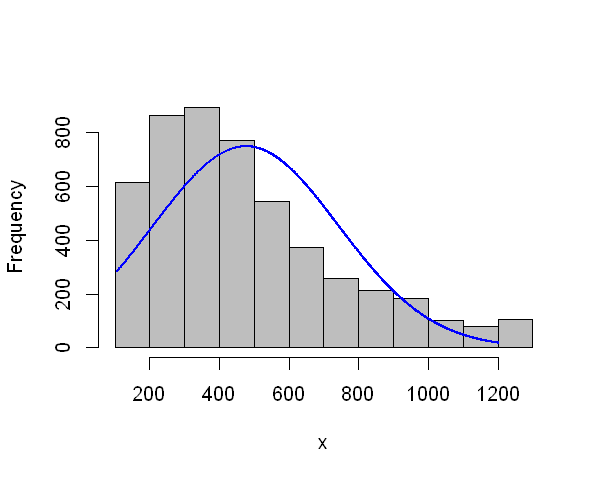

In [18]:
library(repr)
options(repr.plot.width=5, repr.plot.height=4)
plotNormalHistogram(cust_final$total_spent)
shapiro.test(cust_final$total_spent)

This clearly shows that the total spent variable is not normally distributed. Its shape resembles the shape of an exponential distribution. A square root of the values is taken and examined for normality

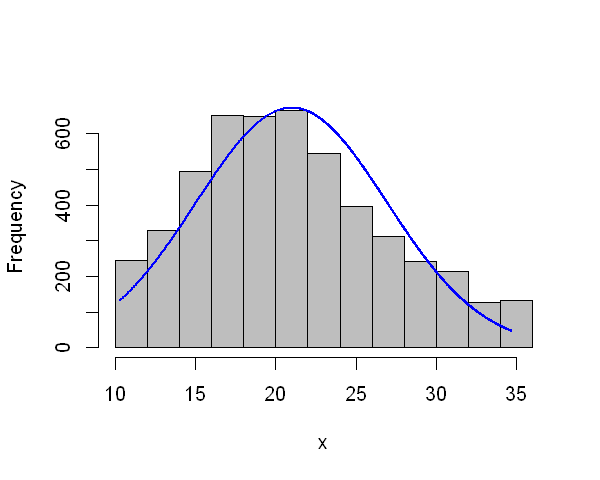

In [19]:
cust_final$total_spent_sqrt <-  sqrt(cust_final$total_spent)
plotNormalHistogram(cust_final$total_spent_sqrt)

Now it resembles a normal distribution

#### Checking if Y variables and X Variables are correlated

Categorical variables are tested if they are related to the Y variables using ANOVA

In [20]:
Anov <- function(x){
  summary(aov(cust_final$total_spent~x))
}

cats <- cust_final[,!numerics,with = F]
cats$total_spent <- NULL
cats$total_spent_sqrt <- NULL

apply(cats, 2, FUN = Anov)

Warning message in `[.data.table`(cust_final, , !numerics, with = F):
"column(s) not removed because not found: carditems,cardspent,card2items,card2spent,lntollmon,lntollten,lnequipmon,lnequipten,lncardmon,lncardten,lnwiremon,lnwireten"

From the above analysis, we take only the significant variables

In [21]:
remove <- c("custid","townsize","birthmonth","default","marital","cars","carbought","carbuy","commute","commutecat",
             "commutecar","commutemotorcycle","commutecarpool","commutebus","commuterail","commutepublic","commutewalk",
             "commutenonmotor","telecommute","polparty","cardtype","cardbenefit","cardfee","card2type","card2benefit",
             "active","churn","response_01")
cust_final <- cust_final[,!..remove,]

In [22]:
total_spent <- cust_final$total_spent
cust_final$total_spent <- NULL

Now we run an initial regression model with the whole dataset ands also perform a stepwise regression

In [23]:

fit1 <- lm(total_spent_sqrt~.,data = cust_final)
summary(fit1)

# step(fit1,direction = "both")


Call:
lm(formula = total_spent_sqrt ~ ., data = cust_final)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2917  -3.6961  -0.2673   3.4230  16.7115 

Coefficients: (2 not defined because of singularities)
                  Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)    20.56977214  2.03656452  10.100 < 0.0000000000000002 ***
age            -0.03626462  0.02048454  -1.770              0.07673 .  
ed              0.02868739  0.09768811   0.294              0.76903    
union           0.18171720  0.20446603   0.889              0.37419    
income          0.01017152  0.00977900   1.040              0.29833    
lninc           2.51702117  0.53211201   4.730           0.00000231 ***
debtinc        -0.04912462  0.03287907  -1.494              0.13521    
creddebt        0.09049332  0.10135304   0.893              0.37198    
lncreddebt      0.12800491  0.15344294   0.834              0.40420    
othdebt         0.10356394  0.06292129   1.646             

The final model provided by the stepwise regression is as follows:

In [25]:
fit2 <- lm(formula = total_spent_sqrt ~ age + income + lninc + creddebt + 
             longmon + cardmon + region + gender + edcat + jobcat + address + 
             addresscat + commutebike + card + card2 + card2fee + multline + 
             voice + internet + owndvd + response_03, data = cust_final)
summary(fit2)


Call:
lm(formula = total_spent_sqrt ~ age + income + lninc + creddebt + 
    longmon + cardmon + region + gender + edcat + jobcat + address + 
    addresscat + commutebike + card + card2 + card2fee + multline + 
    voice + internet + owndvd + response_03, data = cust_final)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4430  -3.6657  -0.3005   3.4571  16.1574 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 18.097819   1.065612  16.984 < 0.0000000000000002 ***
age         -0.019378   0.007838  -2.472              0.01345 *  
income       0.012483   0.006464   1.931              0.05351 .  
lninc        2.749583   0.351849   7.815  0.00000000000000668 ***
creddebt     0.103918   0.054039   1.923              0.05453 .  
longmon      0.020763   0.010863   1.911              0.05601 .  
cardmon     -0.011521   0.006573  -1.753              0.07969 .  
region       0.118296   0.051203   2.310              0.02091 *  
gender    

Now we perform class conversions on few of the final categorical variables

In [26]:
cust_final$region <- factor(cust_final$region,levels = c(1,2,3,4,5),labels = c("zone 1","zone 2","zone 3","zone 4", "zone 5"))
cust_final$gender <- factor(cust_final$gender, levels = c(0,1),labels = c("Male","Female"))
cust_final$edcat <- factor(cust_final$edcat, levels = c(1,2,3,4,5), labels = c("Did not complete high school","High school degree","Some college","College degree","Post-undergraduate degree"))
cust_final$jobcat <- factor(cust_final$jobcat, levels= c(1,2,3,4,5,6), labels = c("Managerial and Professional","Sales and Office","Service","Agricultural and Natural Resources","Precision Production, Craft, Repair","Operation, Fabrication, General Labor"))
cust_final$address <- as.factor(cust_final$address)
cust_final$addresscat <-  factor(cust_final$addresscat, levels = c(1,2,3,4,5), labels = c("Less than 3","4 to 7","8 to 15","16 to 25","More than 25"))
cust_final$commutebike <- factor(cust_final$commutebike, levels = c(0,1), labels = c("No","Yes"))
cust_final$card <- factor(cust_final$card, levels = c(1,2,3,4,5), labels = c("American Express","Visa","Mastercard","Discover","Other"))
cust_final$card2 <- factor(cust_final$card2, levels = c(1,2,3,4,5), labels = c("American Express","Visa","Mastercard","Discover","Other"))
cust_final$card2fee <- factor(cust_final$card2fee, levels = c(0,1), labels = c("No","Yes"))
cust_final$multline <- factor(cust_final$multline, levels = c(0,1), labels = c("No","Yes"))
cust_final$voice <- factor(cust_final$voice, levels = c(0,1), labels = c("No","Yes"))
cust_final$internet <- factor(cust_final$internet, levels = c(0,1,2,3,4), labels = c("None", "Dia-up","DSL","Cable modem","Other"))
cust_final$owndvd <- factor(cust_final$owndvd, levels = c(0,1), labels = c("No","Yes"))
cust_final$response_03 <- factor(cust_final$response_03, levels = c(0,1), labels = c("No","Yes"))

### Building the Regression model

We now split the data as testing and training data randomly. This is generally referred to as ***_holdout_*** method mainly to avoid overfitting the model and also testing how well the model will work on unseen data

#### Taking samples

In [27]:
set.seed(654)
samp <-  sample(1:nrow(cust_final),size = floor(nrow(cust_final)*0.7))
cust_final$total_spent <- total_spent

Dev <- cust_final[samp,] 
Test <- cust_final[-samp,] 

ts_dev <- Dev[,"total_spent"]
Dev <- Dev[,-("total_spent")]

Here, we fit in the model that we obtained from stepwise regression

In [28]:
fit2 <- lm(formula = total_spent_sqrt ~ age + income + lninc + creddebt + 
             longmon + cardmon + region + gender + edcat + jobcat + address + 
             addresscat + commutebike + card + card2 + card2fee + multline + 
             voice + internet + owndvd + response_03, data = Dev)
summary(fit2)


Call:
lm(formula = total_spent_sqrt ~ age + income + lninc + creddebt + 
    longmon + cardmon + region + gender + edcat + jobcat + address + 
    addresscat + commutebike + card + card2 + card2fee + multline + 
    voice + internet + owndvd + response_03, data = Dev)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.7382  -3.5196  -0.2044   3.2667  15.0348 

Coefficients: (4 not defined because of singularities)
                                             Estimate Std. Error t value
(Intercept)                                 19.914601   1.267618  15.710
age                                         -0.014831   0.009505  -1.560
income                                       0.010178   0.007656   1.329
lninc                                        2.747411   0.420624   6.532
creddebt                                     0.125053   0.062458   2.002
longmon                                      0.020285   0.012633   1.606
cardmon                                     -0.010428   0.0

By removing those variables that are insignificant, we get

In [29]:
fit3 <- lm(formula = total_spent_sqrt ~ lninc + creddebt + 
             region + gender + edcat + jobcat + 
             card + card2 + card2fee + 
             voice + response_03, data = Dev)
summary(fit3)


Call:
lm(formula = total_spent_sqrt ~ lninc + creddebt + region + gender + 
    edcat + jobcat + card + card2 + card2fee + voice + response_03, 
    data = Dev)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0322  -3.4987  -0.2634   3.2855  14.7520 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 18.136585   0.679098  26.707
lninc                                        3.074851   0.154876  19.854
creddebt                                     0.135216   0.060892   2.221
regionzone 2                                 0.309713   0.261210   1.186
regionzone 3                                 0.006137   0.258817   0.024
regionzone 4                                 0.203894   0.262512   0.777
regionzone 5                                 0.525003   0.258771   2.029
genderFemale                                -0.547168   0.165133  -3.314
edcatHigh school degree                     -0.052306   0.2443

Now we identify influential observations and remove them, else we risk overfitting the model

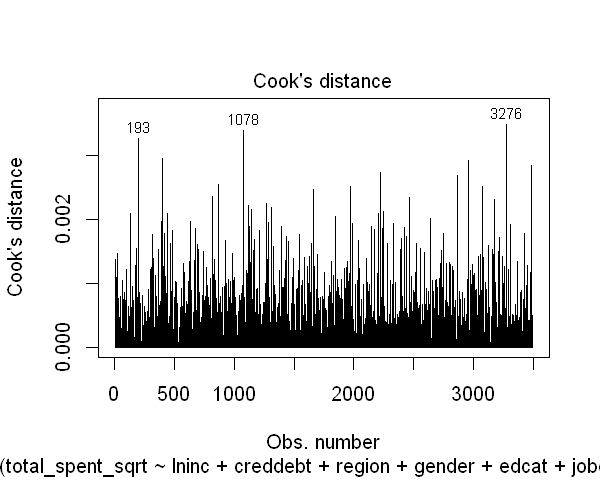

In [30]:
plot(fit3, pch = 18, which = c(4))
Dev$CD <- cooks.distance(fit3)
Dev1 <- Dev[CD<(4/3498)]

Now we run the regression model again

In [31]:
fit4 <- lm(formula = total_spent_sqrt ~ lninc + creddebt + 
             region + gender + edcat + jobcat + 
             card + card2 + card2fee + 
             voice + response_03, data = Dev1)
summary(fit4)


Call:
lm(formula = total_spent_sqrt ~ lninc + creddebt + region + gender + 
    edcat + jobcat + card + card2 + card2fee + voice + response_03, 
    data = Dev1)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.3372  -3.3019  -0.1292   3.2100  11.5625 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 18.16784    0.63401  28.656
lninc                                        3.19150    0.14485  22.033
creddebt                                     0.11593    0.05739   2.020
regionzone 2                                 0.22698    0.24122   0.941
regionzone 3                                -0.11936    0.23959  -0.498
regionzone 4                                 0.14206    0.24256   0.586
regionzone 5                                 0.51691    0.23915   2.161
genderFemale                                -0.54128    0.15318  -3.534
edcatHigh school degree                     -0.06973    0.22648  -0.30

We check for influential observations again

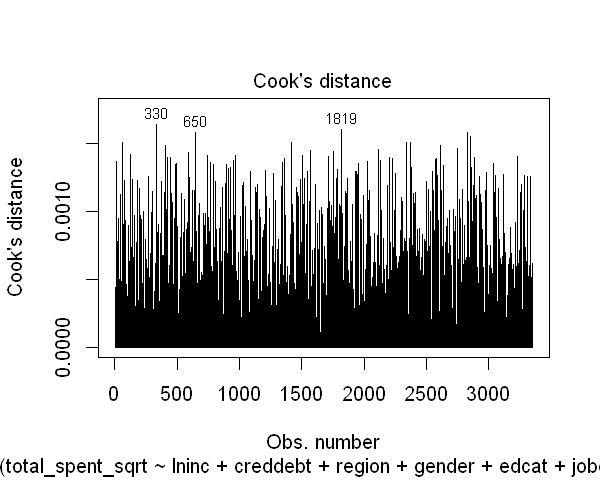

In [32]:
plot(fit4, pch = 18, which = c(4))
Dev1$CD <- cooks.distance(fit4)
Dev2 <- Dev1[CD<(4/3354)]

As there were still more influential observations, we remove them too.

***NOTE:*** The value of ratio between 4 and the number of observations is an arbitrary value that has seen to work best in removing the influential variables

We build another regression model with the remaining data

In [33]:
fit5 <- lm(formula = total_spent_sqrt ~ lninc + creddebt + 
             region + gender + edcat + jobcat + 
             card + card2 + card2fee + 
             voice + response_03, data = Dev2)
summary(fit5)


Call:
lm(formula = total_spent_sqrt ~ lninc + creddebt + region + gender + 
    edcat + jobcat + card + card2 + card2fee + voice + response_03, 
    data = Dev2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4713  -3.1848  -0.1047   3.1514  11.4202 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 17.99482    0.61487  29.266
lninc                                        3.23784    0.14071  23.011
creddebt                                     0.12499    0.05556   2.249
regionzone 2                                 0.22841    0.23280   0.981
regionzone 3                                -0.26173    0.23113  -1.132
regionzone 4                                 0.05624    0.23415   0.240
regionzone 5                                 0.47263    0.23066   2.049
genderFemale                                -0.58629    0.14810  -3.959
edcatHigh school degree                     -0.06819    0.21887  -0.31

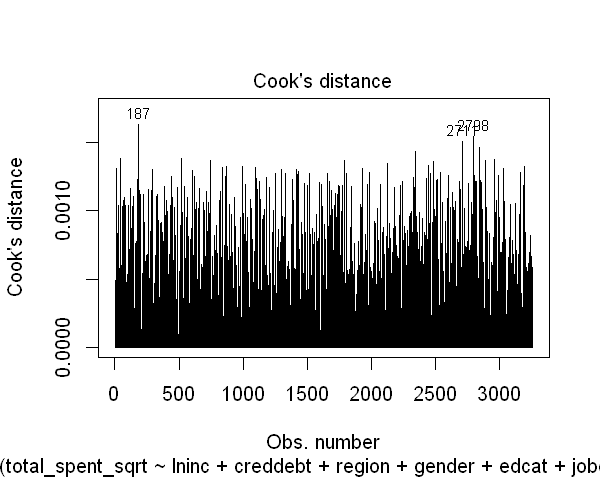

In [34]:
plot(fit5, pch = 18, which = c(4))

This does not have many outliers that will drastically impact the model, thus we assume this model to have overcome the problem of outliers

Now we test for the Multicollinearity in the data. Variance Inflation Factor (VIF) is the measure for that.

In [36]:
library(car)
(VIF <- car::vif(fit4))
(tolerance <- 1/VIF)


,GVIF,Df,GVIF^(1/(2*Df))
lninc,1.679257,1,1.295862
creddebt,1.548939,1,1.244564
region,1.031660,4,1.003904
gender,1.017449,1,1.008687
edcat,1.307938,4,1.034126
jobcat,1.081132,5,1.007831
card,1.867058,4,1.081172
card2,1.763097,4,1.073457
card2fee,1.010695,1,1.005333
voice,1.139749,1,1.067590


,GVIF,Df,GVIF^(1/(2*Df))
lninc,0.5955014,1.00,0.7716874
creddebt,0.6456032,1.00,0.8034943
region,0.9693118,0.25,0.9961115
gender,0.9828506,1.00,0.9913882
edcat,0.7645621,0.25,0.9670003
jobcat,0.9249561,0.20,0.9922295
card,0.5356019,0.25,0.9249223
card2,0.5671837,0.25,0.9315699
card2fee,0.9894178,1.00,0.9946948
voice,0.8773864,1.00,0.9366891


VIF of all variables into consideration are below 5 and the tolerance level for all the levels are above the required 0.2.

We remove the same influential observations from the main target variable 

In [37]:
ts_dev <- ts_dev[Dev$CD<(4/3498)]
ts_dev <- ts_dev[Dev1$CD<(4/3354)]

The final predicted values are added to the dataset

In [38]:
dev_final <- data.frame(cbind(Dev2,ts_dev,pred_sq = predict(fit5, newdata=Dev2)))
dev_final$pred <- (dev_final$pred_sq)^2

We do the same now for ***Testing data***

In [40]:
val1 <- data.frame(cbind(Test, pred_sq = predict(fit5, newdata=Test)))
val1$pred <- (val1$pred_sq)^2

#### MODEL ACCURACY AND PERFORMANCE TEST

**Mean Actual Percentage Error (MAPE)**

In [41]:
m1 <- DescTools::MAPE(x=dev_final$pred,dev_final$total_spent)
m2 <- DescTools::MAPE(x=val1$pred,val1$total_spent)
c(Dev = m1, Val = m2)

Dev       Val 
0.3932836 0.4222888

The MAPE values here are simmilar, proving that the model is good

**Root Mean Square of Error (RMSE)**

In [42]:
m1 <- DescTools::RMSE(x=dev_final$pred,dev_final$total_spent)
m2 <- DescTools::RMSE(x=val1$pred,val1$total_spent)
m3 <- max(cust_final$total_spent)-min(cust_final$total_spent)
c(Dev = m1, Val = m2, Range = m3)

Dev       Val     Range 
 181.9257  222.7639 1095.6385

The RMSE is also similar, given that the range of the variable is 1095 and the difference is only 9 and the value is less. These measures have proven the model is a good fit. But for a final confirmation, we do decile analysis

**Decile Analysis**

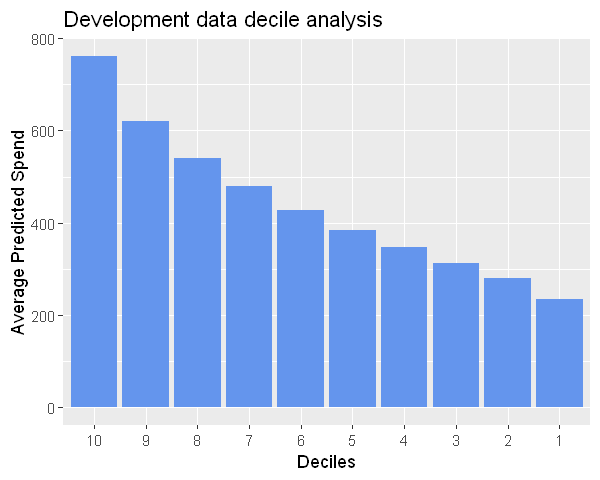

In [43]:
#Decile analysis Training data
decLocations <- quantile(dev_final$pred, probs = seq(0.1,0.9,by=0.1))
dev_final$decile <- findInterval(dev_final$pred,c(-Inf,decLocations, Inf))
dev_final$spen <- dev_final$total_spent

dev_decile <- dev_final %>% group_by(decile) %>% 
  summarise(count = n(),
            avg_pred_spend = mean(pred),
            avg_spend = mean(spen)
  )%>% 
  dplyr::arrange(desc(decile))


require(ggplot2)
Decile_Plot <- ggplot(dev_decile)+aes(x = reorder(factor(decile),-decile),y = avg_pred_spend) +
  geom_bar(stat = "identity",fill = "cornflowerblue")+
  ggtitle("Development data decile analysis")+
  xlab("Deciles")+
  ylab("Average Predicted Spend")

plot(Decile_Plot)

This shows a smooth step shape decrease in the value, denoting that the model is a good fit.

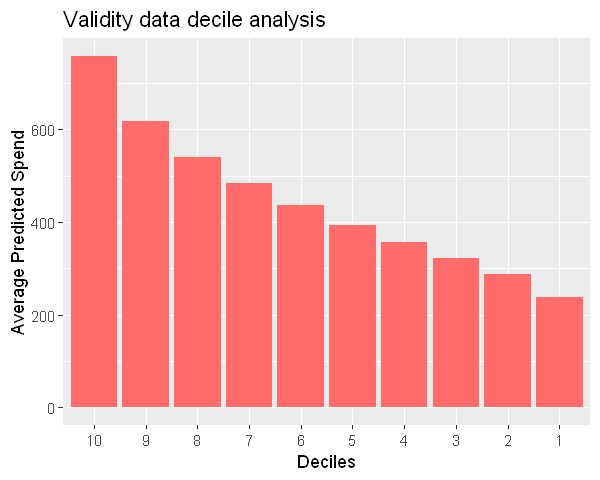

In [44]:
# Decile analysis Validity data
decLocations <- quantile(val1$pred, probs = seq(0.1,0.9,by=0.1))
val1$decile <- findInterval(val1$pred,c(-Inf,decLocations, Inf))

val_decile <- val1 %>% group_by(decile) %>% 
  dplyr::summarise(count = n(),
                   avg_pred_spend = mean(pred),
                   avg_spend = mean(total_spent)
  ) %>% 
  dplyr::arrange(desc(decile))


Decile_Plot <- ggplot(val_decile)+aes(x = reorder(factor(decile),-decile),y = avg_pred_spend) +
  geom_bar(stat = "identity",fill = "indianred1")+
  ggtitle("Validity data decile analysis")+
  xlab("Deciles")+
  ylab("Average Predicted Spend")

plot(Decile_Plot)

The decile analysis for the testing dataset also shows the same shape. Thus, this model is reliable.

Finally, we also examine the correlation between the predicted and the actual values for both the training and testing data and see the correlation coefficient.

CorDev    CorVal 
0.6737135 0.5744624

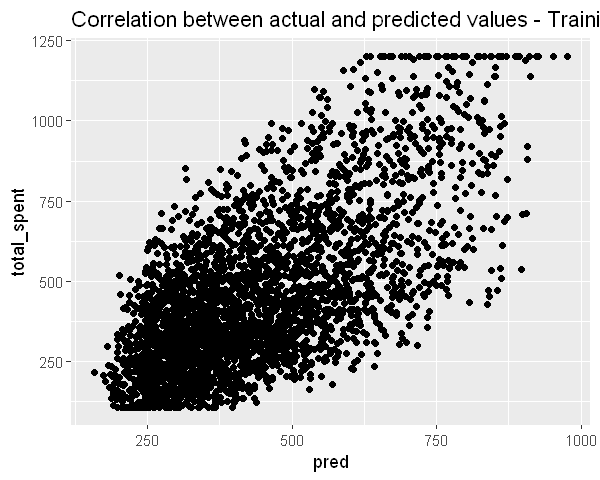

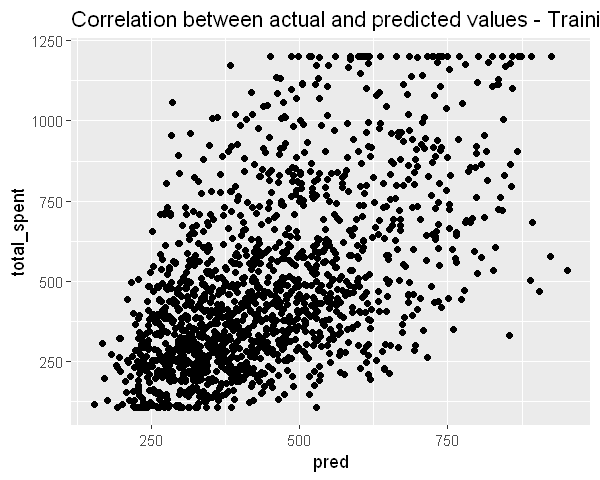

In [45]:
m1 <- cor(dev_final$pred,dev_final$total_spent)
m2 <- cor(val1$pred,val1$total_spent)
c(CorDev = m1, CorVal = m2)

ggplot(dev_final)+aes(x=pred,y=total_spent)+
  geom_point()+
  ggtitle("Correlation between actual and predicted values - Training Data")

ggplot(val1)+aes(x=pred,y=total_spent)+
  geom_point()+
  ggtitle("Correlation between actual and predicted values - Training Data")

These two plots have shown that there is a lot of dispersion in the data as the value goes higher. A machine learning model might, hopefully have better performance than this model. We will test that next